<a href="https://colab.research.google.com/github/Someshwarms/sentiment-analysis-with-DL/blob/main/Sentiment_analysis_with_RNN(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [66]:
#importing all the required files which is required
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#Loading the data
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Tweets.csv")

In [4]:
df.head(n=5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
#from this dataset we onliy need the text and sentiment columns
#data preprocessing

In [6]:
review_df=df[['text','airline_sentiment']]
print(review_df.shape)
review_df.head(n=5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [8]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
review_df=review_df[review_df['airline_sentiment']!='neutral']
print(review_df.shape)
review_df.head(n=5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [10]:
review_df['airline_sentiment']

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11541, dtype: object

In [11]:
review_df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


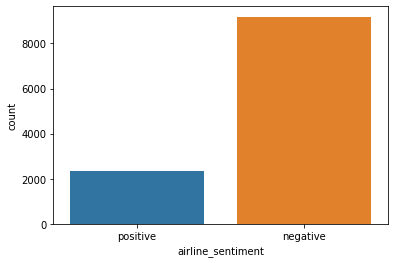

In [12]:
#data visulaization
sns.countplot('airline_sentiment',data=review_df)

In [ ]:
#Text Vectorization of dependent feature

In [13]:
sentiment_label=review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
#text vectorization of independent feature

In [14]:
tweet=review_df.text.values
tweet

array(["@VirginAmerica plus you've added commercials to the experience... tacky.",
       '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
       "@VirginAmerica and it's a really big bad thing about it", ...,
       '@AmericanAir thank you we got on a different flight to Chicago.',
       "@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc",
       "@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"],
      dtype=object)

In [15]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [16]:
encodedd_docs=tokenizer.texts_to_sequences(tweet)

In [73]:
pad_sequences=tf.keras.preprocessing.sequence.pad_sequences(encodedd_docs,maxlen=200)

In [78]:
pad_sequences[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [19]:
embedding_vector_length=32
voc_size=13233
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(voc_size,embedding_vector_length,input_length=200))
model.add(tf.keras.layers.SpatialDropout1D(0.25))
model.add(tf.keras.layers.LSTM(50,dropout=0.5,recurrent_dropout=0.5))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           423456    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 440,107
Trainable params: 440,107
Non-trainable params: 0
_________________________________________________________________


In [60]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=, batch_size=32)

Epoch 1/5
289/289 [==============================] - 75s 249ms/step - loss: 0.3858 - accuracy: 0.8399 - val_loss: 0.2082 - val_accuracy: 0.9207
Epoch 2/5
289/289 [==============================] - 71s 244ms/step - loss: 0.2137 - accuracy: 0.9192 - val_loss: 0.1885 - val_accuracy: 0.9385
Epoch 3/5
289/289 [==============================] - 70s 243ms/step - loss: 0.1835 - accuracy: 0.9308 - val_loss: 0.2025 - val_accuracy: 0.9264
Epoch 4/5
289/289 [==============================] - 70s 243ms/step - loss: 0.1552 - accuracy: 0.9443 - val_loss: 0.1753 - val_accuracy: 0.9363
Epoch 5/5
289/289 [==============================] - 72s 249ms/step - loss: 0.1200 - accuracy: 0.9568 - val_loss: 0.1820 - val_accuracy: 0.9394


In [ ]:
#Data visulaization of Training data

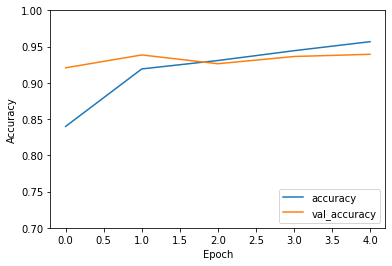

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

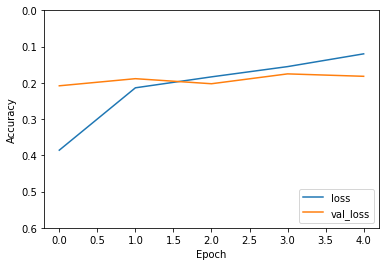

In [69]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0])
plt.legend(loc='lower right')

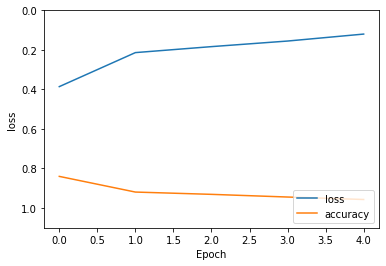

In [70]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([1.1,0])
plt.legend(loc='lower right')

In [ ]:
#data prediction

In [93]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = tf.keras.preprocessing.sequence.pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

Predicted label:  positive
Predicted label:  negative
